In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os.path 
from tabulate import tabulate

In [2]:
save_path = '/home/joao/Documentos/LC/'

table = []

In [3]:
x_gr = np.linspace(-10, 50, 60 + 1)

In [4]:
#time, flux, flux error and bands
x_dat = []
z_dat = []
z_dat_error = []
bands = []
zeropoint = []

#reading the file
file = open("SN2004eo.txt")
lines = file.readlines()
file.close()

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    x_dat.append(co[0])
    z_dat.append(co[2])
    z_dat_error.append(co[3])
    bands.append(co[1])
    zeropoint.append(co[4])

redshift = float(co[6])
print(redshift)
    
x_dat = [float(i) for i in x_dat]
z_dat = [float(i) for i in z_dat]
z_dat_error = [float(i) for i in z_dat_error]
zeropoint = [float(i) for i in zeropoint]

0.0157


In [5]:
thbands = ['cspb', 'cspg', 'cspr', 'cspi']

In [6]:
for ii in range(0,len(thbands)):
    
    x = []
    z = []
    ez = []
    zp = []

    for i in range(0,len(bands)):

        if bands[i] == thbands[ii]:

            x.append(x_dat[i])
            z.append(z_dat[i])
            ez.append(z_dat_error[i])
            zp.append(zeropoint[i])

    #time, flux, flux error and bands
    fun_x0 = []
    fun_x1 = []
    fun_x2 = []

    #reading the file
    file = open("/home/joao/Documentos/LC/integratedfunctions/"+ thbands[ii] +".dat")
    lines = file.readlines()
    file.close()

    for line in lines:
        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        fun_x0.append(co[0])
        fun_x1.append(co[1])
        fun_x2.append(co[2])


    fun_x0 = [float(i) for i in fun_x0]
    fun_x1 = [float(i) for i in fun_x1]
    fun_x2 = [float(i) for i in fun_x2]

    factor = max(fun_x0)/max(z)

    nz = []
    nez = []
    nband = []
    nzp = []

    for i in range(0,len(z)):

        nz.append(z[i]*factor)
        nez.append(ez[i]*factor)
        nband.append(thbands[ii])
        nzp.append(zp[i])

    for i in range(0,len(x)):

        table.append((x[i], nband[i], nz[i], nez[i], nzp[i], "csp", redshift))

In [7]:
name_of_file = "SN2004eomod"

completeName = os.path.join(save_path, name_of_file+".txt")    

header = "#time    band  flux        fluxerr      zp     zpsys redshift"

f = open(completeName, 'w')               
f.write(header + "\n")
f.write(tabulate(table, tablefmt="plain"))
f.close()

<IPython.core.display.Javascript object>


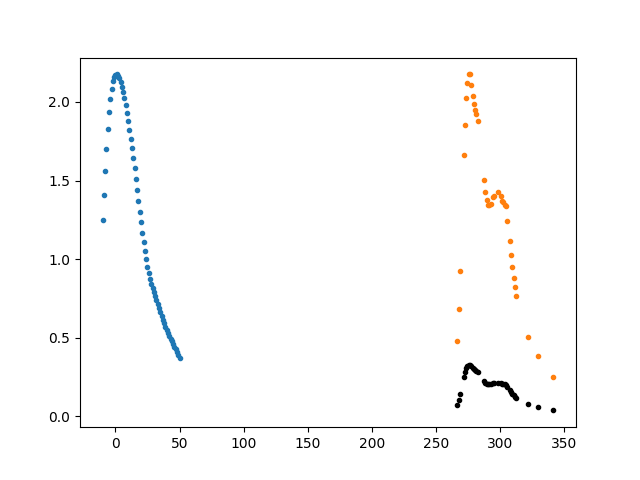

In [8]:
%matplotlib notebook
plt.plot(x, z, '.k')
plt.plot(x_gr, fun_x0, '.')
plt.plot(x, nz, '.')
plt.show()